# Quiz 1 | Aprendizaje Automático
## Estudiante: Marco Ferraro

## 1.0 Cargar Datos y Visualizar

En esta sección se cargan los datos y se visualizan para tener una idea de la distribución de los mismos. Adicionalmente se utilizará estadistica descriptiva para tener un mejor entendimiento de la naturaleza de los datos.

### 1.1 Cargar Datos

Se cargan los datos utilizando la librería pandas y se visualizan las primeras 5 filas para tener una idea de la estructura de los datos.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cars_df = pd.read_csv('./data/imports-85.data', header=None, delimiter=',')
cars_df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Es buena practica renombrar las columnas para tener un mejor entendimiento de los datos. Por lo tanto se renombran las columnas utilizando los metadatos del set de datos. 

Recordemos que el target es la columna "price" para este ejercicio.

In [40]:
column_map = {
    0: 'symboling',
    1: 'normalized-losses',
    2: 'make',
    3: 'fuel-type',
    4: 'aspiration',
    5: 'num-of-doors',
    6: 'body-style',
    7: 'drive-wheels',
    8: 'engine-location',
    9: 'wheel-base',
    10: 'length',
    11: 'width',
    12: 'height',
    13: 'curb-weight',
    14: 'engine-type',
    15: 'num-of-cylinders',
    16: 'engine-size',
    17: 'fuel-system',
    18: 'bore',
    19: 'stroke',
    20: 'compression-ratio',
    21: 'horsepower',
    22: 'peak-rpm',
    23: 'city-mpg',
    24: 'highway-mpg',
    25: 'price'
}

cars_df.rename(columns=column_map, inplace=True)
cars_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [41]:
cars_df.shape

(205, 26)

### 1.2 Estadistica Descriptiva

Se utiliza la función describe() de pandas para obtener estadistica descriptiva de los datos. Esto nos permite tener una idea de la distribución de los datos y de la naturaleza de los mismos. 

In [42]:
cars_df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Recordemos que el data frame posee 26 columnas, pero estamos viendo solo las columna que posee datos numéricos, no las columnas que poseen datos categóricos.

Llama la atencion que la columna 14 posee una desviación estandar de 520, lo cual es muy alto comparado con el resto de las columnas. Esto puede indicar que la columna posee valores atípicos o outliers.

### 1.3 Visualización de Datos

Se visualizan los datos utilizando la librería matplotlib. Al igual que la tarea anterior, se utilizarán varios gráficos para tener una idea de la distribución de los datos.

#### 1.3.1 Boxplot

El boxplot o diagrama de caja y bigotes es un gráfico que permite visualizar la distribución de los datos. Esta representación gráfica permite visualizar la mediana, los cuartiles, los valores atípicos y el rango intercuartil. 

Vamos a visualizar el diagrama de caja de cada columna con valores numéricos para tener una idea de la distribución de los datos. Empezaremos con la columna 1.

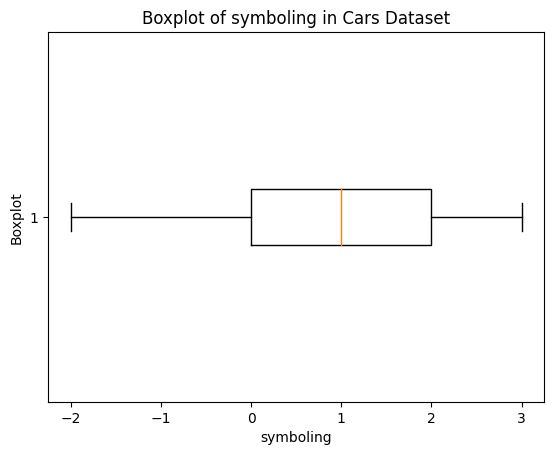

In [43]:
plt.boxplot(cars_df['symboling'], vert=False)

plt.xlabel('symboling')
plt.ylabel('Boxplot')

plt.title('Boxplot of symboling in Cars Dataset')


plt.show()

Podemos ver la columna `symboling` mantiene valores entre -2 y 3. Sin embargo, este gráfico no nos aporta mucho ya que el describe de pandas nos representa valores númericos de forma exacta. La mejor opción es visualizar las columnas que se ven atipicas con este tipo de gráfico.

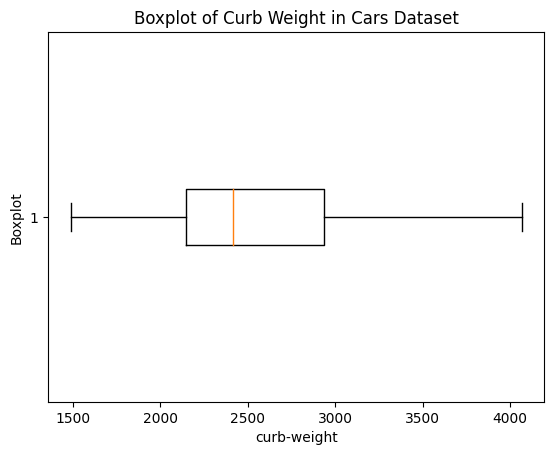

In [44]:
plt.boxplot(cars_df['curb-weight'], vert=False)

plt.xlabel('curb-weight')
plt.ylabel('Boxplot')

plt.title('Boxplot of Curb Weight in Cars Dataset')


plt.show()

Al visualizar los valores de la columna 14 nos damos cuenta que posee un rango muy grande, y mantiene un rango intercuartil muy grande. Sin embargo, no se visualizan valores atípicos o outliers, a como se había mencionado anteriormente.

#### 1.3.2 Matriz de Correlación

Debido a las ensezanazas de la tarea anterior se utilizará una matriz de correlación para visualizar la relación entre las variables. Esto es de gran ayuda ya que podemo visualizar de una forma más clara cuales columnas poseen una relación lineal entre ellas. Recordemos que para esto solo vamos a utilizar las columnas que poseen valores numéricos.

Cabe mencionar, que tambien vamos a ignorar, por ahora, las columnas que presenten datos faltantes, ya que no podemos visualizar la relación entre variables si no poseemos todos los datos. La inputación de datos faltantes se realizará más adelante.

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = []

for column_name, dtype in cars_df.dtypes.items():
    if dtype == 'int64' or dtype == 'float64':
        columns.append(column_name)

matrix = cars_df[columns].corr()

matrix

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,-0.035823,0.034606
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,-0.470414,-0.544082
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,-0.670909,-0.704662
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,-0.642704,-0.677218
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.048640,-0.107358
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,-0.757414,-0.797465
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,-0.653658,-0.677470
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,0.324701,0.265201
city-mpg,-0.035823,-0.470414,-0.670909,-0.642704,-0.048640,-0.757414,-0.653658,0.324701,1.000000,0.971337
highway-mpg,0.034606,-0.544082,-0.704662,-0.677218,-0.107358,-0.797465,-0.677470,0.265201,0.971337,1.000000


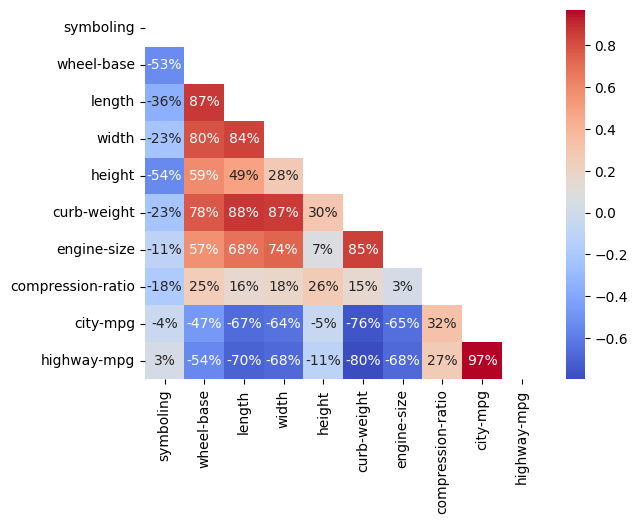

In [46]:
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, fmt=".0%", mask=mask, cmap='coolwarm')

# Display the plot
plt.show()

Estamos ignorando la diagonal ya que la correlación de una variable consigo misma es 1.0. Dicho esto, podemos apreciar que los datos de `city-mpg` con la columna de `highway-mpg` poseen una correlación de 97%, lo cual es muy alto. Esto nos indica que estas dos columnas poseen una relación lineal muy fuerte y de forma positiva. Hay otras relaciones que son de este nivel, como la relacion entre `wheel-base` y `length`.

Las columnas de `height` y de `engine-size` poseen una correlacion del 7%, lo cual es muy bajo. Esto nos indica que estas dos columnas no poseen una relación lineal fuerte.

Tambien podemos apreciar que columnas, como la `curb-weight` y `highway-mpg` poseen una correlación negativa muy acentuada.

Vamos a realizar un gráfico de dispersión para visualizar la relación entre este set de ejemplos

#### 1.3.3 Gráfico de Dispersión

Se realizarán 3 gráficos de dispersión para visualizar la relación entre las variables. Se utilizarán las columnas mencionadas anteriormente ya que presentan una relación lineal muy fuerte, muy baja y negativa, respectivamente. Vamos a graficar una recta de mejor ajuste para visualizar la relación entre las variables.


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def plot_scatter_plot(x, y, x_label='X', y_label='Y', title='Scatter Plot'):

# Create a linear regression model
  model = LinearRegression()
  model.fit(x, y)

  # Predict the y-values based on the linear regression model
  y_pred = model.predict(x)

# Create scatter plot
  plt.scatter(x, y)

# Add best-fit line
  plt.plot(x, y_pred, color='red')

# Add labels and title
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)

  plt.show()


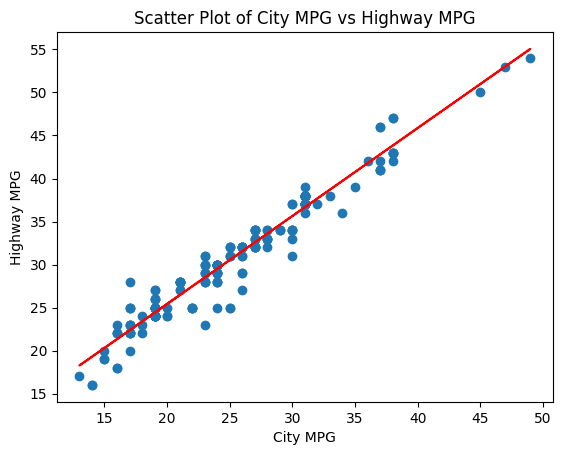

In [48]:
plot_scatter_plot(cars_df['city-mpg'].values.reshape(-1, 1), cars_df['highway-mpg'].values.reshape(-1, 1), 'City MPG', 'Highway MPG', 'Scatter Plot of City MPG vs Highway MPG')

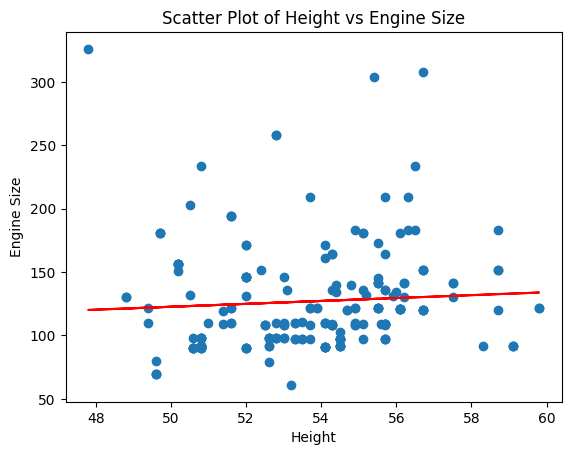

In [49]:
plot_scatter_plot(cars_df['height'].values.reshape(-1, 1), cars_df['engine-size'].values.reshape(-1, 1), 'Height', 'Engine Size', 'Scatter Plot of Height vs Engine Size')

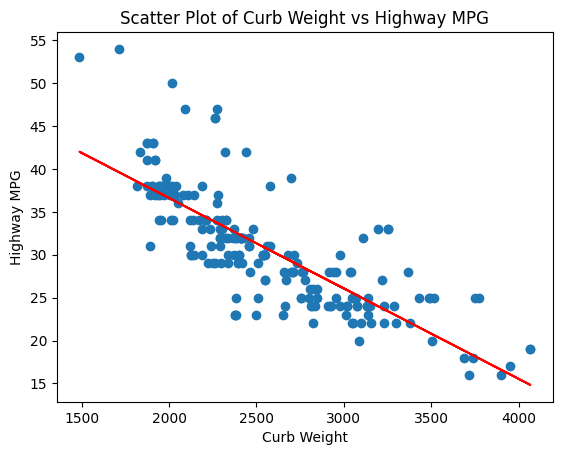

In [50]:
plot_scatter_plot(cars_df['curb-weight'].values.reshape(-1, 1), cars_df['highway-mpg'].values.reshape(-1, 1), 'Curb Weight', 'Highway MPG', 'Scatter Plot of Curb Weight vs Highway MPG')

### 2.0 Atributos Categóricos

En esta sección realizaremos una busqueda en el dataset para encontrar atributos categóricos. Una vez que encontremos que una columna posee datos categoricos vamos a buscar todas las etiquetas únicas y determinar si son ordinames o nominales.

In [51]:
cars_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [52]:
cars_df['make'].value_counts()


toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

La columna `make` posee datos categoricos. Las etiquetas únicas correspondn al fabricante de autos, por lo que son datos nominales. Vemos que la marca más popular es 'toyota' con 32 ejemplos, seguido por 'nissan' con 18 ejemplos.

In [53]:
cars_df['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

Esta columna posee datos que corresponden a etiquetas con valores de `gas` o `diesel`. Estos datos son nominales ya que no existe un orden entre ellos. Vemos que la etiqueta más popular es `gas` con 185 ejemplos, seguido por `diesel` con 20 ejemplos.

In [54]:
cars_df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

Otra columna con datos categoricos es la columna 5. Estos datos corresponden a etiquetas con valores de `std` o `turbo`. Estos datos son nominales ya que no existe un orden entre ellos. Vemos que la etiqueta más popular es `std` con 168 ejemplos, seguido por `turbo` con 37 ejemplos.

In [55]:
cars_df['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

Un caso particular es la columna correspondiente al número de puertas, ya que posee datos faltantes. Sin embargo, podemos ver que los datos que posee son `four`, `two` y `?`. Estos datos son nominales ya que no existe un orden debido a los datos faltantes, sin embargo si se remplazan los datos faltantes por `four` o `two` se puede considerar que existe un orden entre ellos. Vemos que la etiqueta más popular es `four` con 114 ejemplos, seguido por `two` con 89 ejemplos. 

In [56]:
cars_df['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

La columna `body-style` posee datos que se refieren al tipo de modelo de un carro. Estos datos son nominales ya que no existe un orden entre ellos. Vemos que la etiqueta más popular es `sedan` y la menos popular es `convertibel`

In [57]:
cars_df['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

Es esta caso vemos que las etiquetas corresponden a la tracción de un carro. Estos datos son nominales. Vemos que la etiqueta más popular es `fwd` con 120 ejemplos, seguido por `rwd` con 76 ejemplos.

In [58]:
cars_df['engine-location'].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

Estas etiquetas tienen los valores de `front` y `rear`. Estos datos son nominales. Vemos que la etiqueta más popular es `front` con 202 ejemplos.

In [59]:
cars_df['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

Estas etiquetas correspondes al tipo del motor de un carro. Estos datos son nominales. Vemos que la etiqueta más popular es `ohc` con 148 ejemplos.

In [60]:
cars_df['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

Es este caso, los datos son ordinales, ya que corresponden a números con un orden. Vemos que la etiqueta más popular es `four` con 159 ejemplos.

In [61]:
cars_df['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

Y, para la última columna los datos correspondes al modelo del sistema de combustible. Estos datos son nominales ya que no se pueden ordenar con alguna jerarquía. Vemos que la etiqueta más popular es `mpfi` con 94 ejemplos.

### 3.0 Codificación de Atributos Categóricos

Como vimos en el punto anterior, existen columnas que poseen datos categoricos. Para poder utilizar estos datos en un modelo de aprendizaje automático es necesario codificarlos. 

Hay varias formas de tratar las variables categoricas. Una de ellas es la codificación one-hot. Esta codificación consiste en crear una columna por cada etiqueta de la columna categorica. Cada columna nueva tendrá un valor de 1 si la etiqueta de la columna original corresponde a la columna nueva, y 0 en caso contrario. 

Sin embargo, el problema con esta codificación es que si una columna categorica posee muchas etiquetas, la cantidad de columnas nuevas que se crean es muy grande. Esto puede causar problemas de memoria y de tiempo de ejecución al elevar la dimensionalidad del dataset.


Una alternativa para los datos categoricos nominales es el target enconding. Esta codificación consiste en reemplazar cada etiqueta con el promedio de la variable objetivo para esa etiqueta. Por ejemplo, si tenemos una columna categorica con las etiquetas `a`, `b` y `c`, y la variable objetivo es `y`, entonces el valor de `a` será reemplazado por el promedio de `y` para todos los ejemplos que poseen la etiqueta `a`.

Para realizar esto vamos a utilizar la libreria `category_encoders`. Esta libreria usa transformadores de sci-kit learn para realizar la codificación de variables categoricas. En este caso vamos a utilizar el transformador `TargetEncoder` para realizar la codificación de las variables categoricas. 

El proceso se realizara para las columnas categoricas nominales ya que las ordinales se pueden codificar con un mapeo de valores.

In [62]:
cars_target = pd.DataFrame(cars_df['price'])


cars_target['price'] = cars_target['price'].replace('?', np.nan)
cars_target['price'] = pd.to_numeric(cars_target['price'])

mean = cars_target['price'].mean()
cars_target['price'].fillna(mean, inplace=True)

cars_target.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


In [63]:
import category_encoders as ce

nominal_columns = ['make', 'fuel-type', 'aspiration', 'body-style', 'engine-location', 'drive-wheels', 'engine-type', 'fuel-system']

encoder = ce.TargetEncoder(cols=nominal_columns)
cars_df = encoder.fit_transform(cars_df, cars_target['price'])


cars_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,13561.040783,12922.694708,12554.056125,two,14924.839969,19647.606747,12890.482763,88.6,...,130,17508.93709,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,13561.040783,12922.694708,12554.056125,two,14924.839969,19647.606747,12890.482763,88.6,...,130,17508.93709,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,13561.040783,12922.694708,12554.056125,two,10071.417669,19647.606747,12890.482763,94.5,...,152,17508.93709,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,14061.103910,12922.694708,12554.056125,four,14433.045433,9310.995707,12890.482763,99.8,...,109,17508.93709,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,14061.103910,12922.694708,12554.056125,four,14433.045433,12548.675281,12890.482763,99.4,...,136,17508.93709,3.19,3.40,8.0,115,5500,18,22,17450


Para los atributos categoricos ordinales vamos a realizar un mapeo de valores. Las columnas ordinales son `num-of-doors` y `num-of-cylinders`. Para la columna `num-of-doors` vamos a reemplazar los valores `four` y `two` por los valores `4` y `2`, respectivamente. Para la columna `num-of-cylinders` vamos a reemplazar los valores `four`, `six`, `five`, `eight`, `two`, `three` y `twelve` por los valores `4`, `6`, `5`, `8`, `2`, `3` y `12`, respectivamente. 

Los valores faltantes seran remplazados por nan.

In [64]:
mapping_doors = {
    'two': 2,
    'four': 4,
    '?': np.nan
}

mapping_cylinders = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12,
    '?': np.nan
}

cars_df['num-of-doors'] = cars_df['num-of-doors'].map(mapping_doors)
cars_df['num-of-cylinders'] = cars_df['num-of-cylinders'].map(mapping_cylinders)

cars_df['num-of-doors'].value_counts()

4.0    114
2.0     89
Name: num-of-doors, dtype: int64

### 4.0 Imputación de Valores Faltantes

En esta sección vamos a imputar los valores faltantes del dataset. Para todos los datos faltantes vamos a utilizar la media de la columna para reemplazarlos.

La intención de hacerlo de esta forma es reducir el impacto de las métricas de los valores no faltantes del dataset.

In [65]:
for column in cars_df.columns:
    cars_df[column] = pd.to_numeric(cars_df[column])
    cars_df = cars_df.replace('?', np.nan)
    mean = cars_df[column].mean(skipna=True)
    actual = cars_df[column]
    cars_df[column].fillna(mean, inplace=True)

cars_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,13561.040783,12922.694708,12554.056125,2.0,14924.839969,19647.606747,12890.482763,88.6,...,130,17508.93709,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,13561.040783,12922.694708,12554.056125,2.0,14924.839969,19647.606747,12890.482763,88.6,...,130,17508.93709,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,13561.040783,12922.694708,12554.056125,2.0,10071.417669,19647.606747,12890.482763,94.5,...,152,17508.93709,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,14061.103910,12922.694708,12554.056125,4.0,14433.045433,9310.995707,12890.482763,99.8,...,109,17508.93709,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,14061.103910,12922.694708,12554.056125,4.0,14433.045433,12548.675281,12890.482763,99.4,...,136,17508.93709,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### 5.0 Escalado de Datos

En esta sección vamos a escalar los datos del dataset. Hay varias técinas, la primera es comocida como escalado Min Max. También conocido como normalización, este método consiste en escalar los datos de tal forma que el valor mínimo de la columna sea 0 y el valor máximo sea 1.

```
X_scaled = (X - X_min) / (X_max - X_min)
```

Este escalado ofrece ciertas ventajas, como la preservación de la forma de la distribución de los datos. Sin embargo, es muy sensible a los valores atípicos y puede que si los valores se encuentran muy cerca del valor mínimo o máximo, el escalado no sea muy efectivo.

Otra técnica es el escalado estándar. Este método consiste en escalar los datos de tal forma que la media sea 0 y la desviación estándar sea 1.

```
X_scaled = (X - X_mean) / X_std
```

Este escalado es menos sensible a los valores atípicos y puede ser más efectivo que el escalado Min Max. Sin embargo, no preserva la forma de la distribución de los datos.

En este caso vamos a utilizar el escalado estándar para escalar los datos. Es recomendado aplicar el escadalo a todo el dataset, no solo a las X. 

In [66]:
from sklearn import preprocessing

cars_scaled = preprocessing.scale(cars_df)

scaled_df = pd.DataFrame(cars_scaled, columns=cars_df.columns)

cars_df.iloc[:, :] = scaled_df.values

cars_df.std(axis=0)

symboling            1.002448
normalized-losses    1.002448
make                 1.002448
fuel-type            1.002448
aspiration           1.002448
num-of-doors         1.002448
body-style           1.002448
drive-wheels         1.002448
engine-location      1.002448
wheel-base           1.002448
length               1.002448
width                1.002448
height               1.002448
curb-weight          1.002448
engine-type          1.002448
num-of-cylinders     1.002448
engine-size          1.002448
fuel-system          1.002448
bore                 1.002448
stroke               1.002448
compression-ratio    1.002448
horsepower           1.002448
peak-rpm             1.002448
city-mpg             1.002448
highway-mpg          1.002448
price                1.002448
dtype: float64

### 6.0 Selección de Características

En esta sección realizaremos una selección de características por medio de información mutua. La información mutua es una medida de la dependencia entre dos variables. 

El método de selección de características múltiples es un enfoque que implica seleccionar un subconjunto relevante de características (variables) del conjunto de datos original. El objetivo es reducir la dimensionalidad del conjunto de datos, eliminar características irrelevantes o redundantes y retener solo las características más informativas para mejorar el rendimiento del modelo y reducir la complejidad computacional.


De aqui en adelante vamos a separar los datos en `X` y `Y`. `X` va a contener todas las columnas del dataset menos la columna `price`. `Y` va a contener la columna `price`.

In [67]:
X = cars_df.drop('price', axis=1)
y = cars_df['price']

X.shape

(205, 25)

In [68]:
y.value_counts()

 0.000000    4
-0.546035    2
 0.629701    2
-0.555717    2
-0.600305    2
            ..
 4.101236    1
 0.419880    1
-0.995997    1
-0.894080    1
 1.199797    1
Name: price, Length: 187, dtype: int64

Otro aspecto importante, es que para el Mutual Info Classifier se tiene que elegir un hiperparametro como `treshold`. Este hiperparametro es un umbral de decisión para la selección de características. Si el valor de la información mutua de una característica es mayor que el umbral, entonces la característica se selecciona para el conjunto de características. Si el valor de la información mutua de una característica es menor que el umbral, entonces la característica se elimina del conjunto de características.

La mejor forma para seleccionar un valor de `treshold` es por medio de un grids search. Sin embargo, para este caso vamos a utilizar un valor de `treshold` de 0.5.

Recordemos que la variable objetivo es `price`. Esta variable es continua, por lo que vamos a utilizar el método `mutual_info_regression` para calcular la información mutua.

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer 
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn.feature_selection import SelectPercentile 
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_regression

THRESHOLD = 5e-1

mi_score = mutual_info_regression(X, y)

mi_score

array([0.49906562, 0.30960606, 0.54320548, 0.5551851 , 0.62969505,
       0.33265906, 0.85876002, 0.30619022, 0.80834813, 0.42434467,
       0.43122543, 0.38269076, 0.78653219, 0.75628538, 0.86105304])

In [74]:
mi_score_selected_index = np.where(mi_score > THRESHOLD)

X = X.iloc[:, mi_score_selected_index[0]]

X


,wheel-base,length,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg
0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.171065,-0.646553,-0.546059
1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.171065,-0.646553,-0.546059
2,-0.708596,-0.231513,-0.190566,0.514882,0.604046,1.261807,-0.953012,-0.691627
3,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.057230,-0.186865,-0.109354
4,0.107110,0.207256,0.230001,0.516807,0.218885,0.272529,-1.106241,-1.273900
...,...,...,...,...,...,...,...,...
200,1.721873,1.198549,1.398245,0.763241,0.339248,0.247163,-0.340094,-0.400490
201,1.721873,1.198549,1.351515,0.949992,0.339248,1.414003,-0.953012,-0.837195
202,1.721873,1.198549,1.398245,0.878757,1.109571,0.754485,-1.106241,-1.128332
203,1.721873,1.198549,1.398245,1.273437,0.435538,0.044234,0.119594,-0.546059


Podemos ver como se redujo la cantidad de columnas a 8

Se va a separar el dataset en 2 conjuntos, uno de entrenamiento y otro de prueba. El conjunto de entrenamiento va a contener el 80% de los datos y el conjunto de prueba va a contener el 20% de los datos.

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape

(164, 8)

### 7.0 Regresión Polinomial

En esta sección vamos a realizar una regresión polinomial. La regresión polinomial es un tipo de regresión lineal que modela la relación entre la variable dependiente y el polinomio de grado n de la variable independiente.

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degree = X_train.shape[1]

poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_train_poly)

score = model.score(X_train_poly, y_train)
score

0.9960575893024933

In [78]:
from sklearn.metrics import r2_score

pol_r2 = r2_score(y_train, y_pred)
pol_r2

0.9960575893024933

### 8.0 Comparación de Modelos

Vamos a utilizar 3 modelos adicionales para comparar el rendimiento de las regresiones. Los modelos que vamos a utilizar son:

* Regresión Lineal
* Regresión Lasso
* Regresión Ridge

In [79]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

lr_r2 = r2_score(y_train, y_pred)
lr_r2

0.7742792149744355

In [80]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_train)
lasso_r2 = r2_score(y_train, y_pred)
lasso_r2

0.7588813228787522

In [81]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_train)
ridge_r2 = r2_score(y_train, y_pred)

ridge_r2


0.7742787747905473